## Main Course

  Get the code for this tutorial: https://github.com/nicknochnack/ReinforcementLearningCourse.git

  Watch the video: https://www.youtube.com/watch?v=Mut_u40Sqz4&list=WL&index=8&t=141s

  Note: 
  1. The code isn’t exactly the same as in the lecture video or the original repository because I updated and debugged it. I also added notes explaining the reasoning behind each step and the changes I made to make the code easier to understand and use.
  2. And if you run the code in Colab, it requires extra actions. 
  3. The original practice file from the lecture was a Jupyter Notebook using an Anaconda environment. I ran the code the same way to avoid additional setup steps required when using platforms like Google Colab. However, I plan to switch to VS Code in the future for easier and more practical implementation.
  
Finished to 2:24:24 

### 1. Import dependencies
  Documentation: https://stable-baselines3.readthedocs.io/en/master/


In [1]:
# !pip install stable-baselines3

In [2]:
import os # to search the path
#import gym # for openAI gym --> old version
import gymnasium as gym
from stable_baselines3 import PPO # one of algorithms (see the document above)
from stable_baselines3.common.vec_env import DummyVecEnv # train models in multiple environment at same time; speed up training
from stable_baselines3.common.evaluation import evaluate_policy # test model's performance

### 2. Load Environment (Cartpole as example here)

The main environment functions are:
1. env.reset( ) - reset the environment and obtain initial oberservations
2. env.render( ) - visualise the environment
3. env.step( ) - apply an action to the environment
4. env.close( ) - close down the render frame

In [3]:
# create environment
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="rgb_array")
# In the early version, the render_mode is set with env.render(), but now it's better to setup render mode in env 
# to avoid this warning: 
# C:\conda\lib\site-packages\gymnasium\envs\classic_control\cartpole.py:250: 
# UserWarning: WARN: You are calling render method without specifying any render mode. 
# You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")

In [4]:
# # test environment: episodes is like one full game within the environment. Same environments
# have a fixed episode length e.g. cartpole wich is 200 frames. Others are continuous,
# e.g. Breakout, play until you run out of lives.

episodes = 5
for episode in range(1, episodes+1):
    state = env.reset() # Observations for the environment not just for the pole.
    # we will deliver these observations (state) to reinforcement learning agent to learn the optimal value.
    done = False
    truncated = False # This should be setup for new version of Gym
    score = 0

    while not (done or truncated):
        env.render()
        #action = random.choice([0,1]) # I use the funciton from Gym 
        action = env.action_space.sample() # random action
        n_state, reward, done, truncated, info = env.step(action) # pass random action
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:25.0
Episode:2 Score:33.0
Episode:3 Score:19.0
Episode:4 Score:26.0
Episode:5 Score:28.0


Understanding The Environment
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [5]:
# Sample an action and observation
sample_action = env.action_space.sample()
sample_observation = env.observation_space.sample()
initial_observation, info = env.reset()


# Take one step in the environment using the sampled action
next_observation, reward, terminated, truncated, step_info = env.step(sample_action)
done = terminated or truncated  # Indicates whether the episode has ended

print(f"""
🎮 Action Space:
The actions you can take in the environment: {env.action_space}
(0 = push cart to the left, 1 = push cart to the right)
Sampled action: {sample_action}

🧠 Observation Space:
Observations represent [cart position, cart velocity, pole angle, pole angular velocity]
Observation space: {env.observation_space}
Sampled fake observation (random): {sample_observation}

🔁 Initial State:
Initial observation from env.reset(): {initial_observation}

🚶 One Step Result (env.step):
After taking action {sample_action}, we get:
- Next observation (new state): {next_observation}
- Reward: {reward} (typically 1 per step in CartPole)
- Terminated: {terminated} (True if failure condition met, e.g. pole falls)
- Truncated: {truncated} (True if time or step limit is reached)
- Done: {done} (True if either terminated or truncated)
- Info: {step_info} (optional debug info, often empty)
""")



🎮 Action Space:
The actions you can take in the environment: Discrete(2)
(0 = push cart to the left, 1 = push cart to the right)
Sampled action: 0

🧠 Observation Space:
Observations represent [cart position, cart velocity, pole angle, pole angular velocity]
Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Sampled fake observation (random): [ 1.8172773  -0.52287596 -0.37038338 -0.5026539 ]

🔁 Initial State:
Initial observation from env.reset(): [-0.04989693 -0.03863986  0.00358387 -0.00964845]

🚶 One Step Result (env.step):
After taking action 0, we get:
- Next observation (new state): [-0.05066973 -0.23381302  0.0033909   0.2841631 ]
- Reward: 1.0 (typically 1 per step in CartPole)
- Terminated: False (True if failure condition met, e.g. pole falls)
- Truncated: False (True if time or step limit is reached)
- Done: False (True if either terminated or truncated)
- Info: {} (optional debug info, often

Here I would like to see how the results look like, therefore, I used and modified the method I learned from other's repo: https://github.com/szahlner/shadowhand-gym

In [6]:
# create environment
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="rgb_array")

episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    images = [env.render()]
    done = False
    truncated = False 
    score = 0

    while not (done or truncated):
        frame = env.render()
        action = env.action_space.sample() 
        n_state, reward, done, truncated, info = env.step(action) 
        score+=reward
        images.append(frame)
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:12.0
Episode:2 Score:17.0
Episode:3 Score:12.0
Episode:4 Score:46.0
Episode:5 Score:12.0


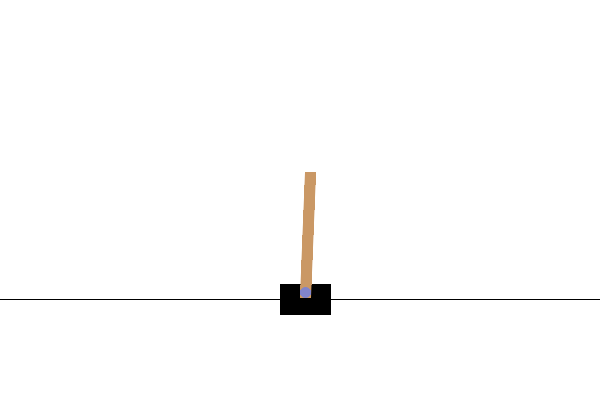

In [7]:
# !pip3 install numpngw
from numpngw import write_apng
from IPython.display import Image
# Convert to apng
write_apng("animation.png", images, delay=60)
# Show animation
Image(filename="animation.png")

### 3. Train an RL Model

Types of Algorithms:
- Model vs Model Free: learning based on predicitons of next state/reward or real samples.
- Stable baselines focuses on Model Free Algorithms.

Choosing Algorithms:
- There are a number of algorithms available through Stable Baselines as shown to the right. We can easily switch between each of these.
- Certain algorithms will perform better for certain environments. Often it helps to review literature in order to determine the best approach.

**Action Space**
- Discrete Single Process: DQN
- Discrete Multi Processed: PPO or A2C
- Continuous Single Process: SAC or TD3
- Continuous Multi Processed: PPO or A2C

Reference:
1. https://spinningup.openai.com/en/latest/index.html
2. https://smartlabai.medium.com/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc
3. Check the characteristics of RL Algorithms: https://stable-baselines3.readthedocs.io/en/master/guide/algos.html
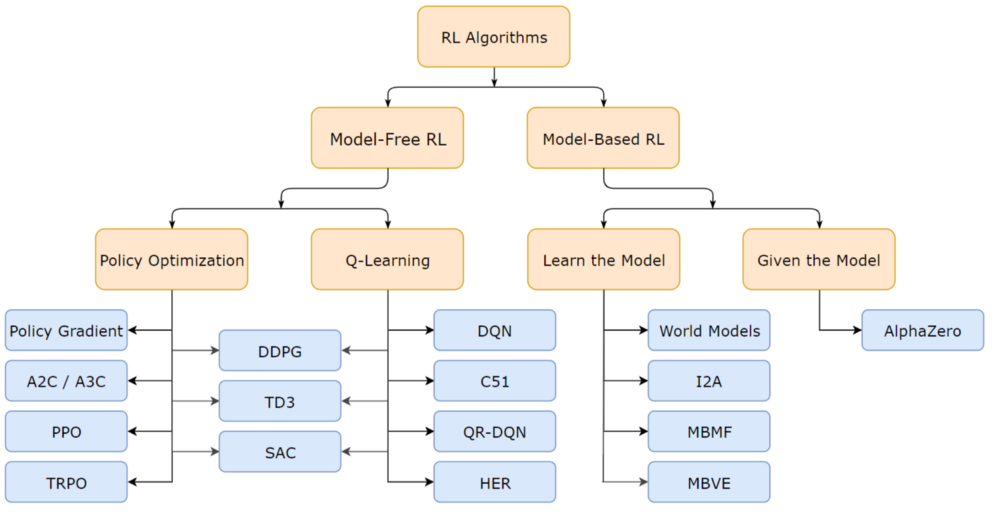

Understanding Training Metrics

Evalution Metrics:
| nollout/           |      |
|    ep_len_mean     | 443  | #On average how long a particular episode lasted before done.
|    ep_rew_mean     | 5.23 | #The average reward that the agent accumulated per episode.
Time Metrics:
| time/              |      |
|    fps             | 2536 | #frames per second
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |

Loss Metrics:
|    entropy_loss         | -0.687      |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 49          |

Other Metrics:
|    explained_variance   | -0.00428    |
|    learning_rate        | 0.0003      |
|    n_updates            | 10          |

Note: I skipped the installation of PyTorch. Please check it by yourself.

In [16]:
log_path = os.path.join('Training', 'Logs')
print(log_path)

env = gym.make(environment_name)
env = DummyVecEnv([lambda: env]) #wrap env in a dummy vector environment
# model = PPO('MlpPolicy', env, verbose = 1) # we use PPO algorithm and MlpPolicy here.
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path) # if you want to log the result on Tensorboard

# Policies are a strategy that an agent uses in pursuit of goals in reinforcement learning.
# There are 3 policy types, CnnPolicy, MultiInputPolicy and MlpPolicy in Stable Baseline3. 

# To check the Doc of PPO
#PPO??

Training\Logs
Using cpu device


In [17]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 2757 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1831        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008766793 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.01        |
|    learning_rate        | 0.0003      |
|    loss                 | 7.01        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 53.2        |
-----------------------------------------
---

### 4. Save and Reload Model

In [18]:
# Make a directory to save model
# Note that if you use windows system, please avoid "blank space" in the folder name.
PPO_path = os.path.join('Training', 'Saved_Models', 'PPO_model')
model.save(PPO_path)
print("Model is saved at: ",PPO_path)

#del model #delete model from memory
#load_model = PPO.load('Training\Saved Models\PPO_model', env=env) # reload the model if you delete before

Model is saved at:  Training\Saved_Models\PPO_model


### 5. Evaluation

In [11]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

C:\conda\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
C:\conda\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:244: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


(500.0, 0.0)

In [19]:
# To remove the Monitor wrapper warning, you should wrap your environment using Monitor before passing it to 
# evaluate_policy() or training:

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym

# Create the environment with rendering and wrap it
# To fix the render warning, add render_mode="human" when creating the environment. This enables proper rendering:
env = gym.make("CartPole-v1", render_mode="rgb_array")  # actually I tried with "rgb_array", it also worked well.
env = Monitor(env) # Wrap with Monitor to track episode stats

# Evaluate the trained model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)

print(f"Mean reward: {mean_reward}, Std: {std_reward}")

# Note: CartPole Reward 
# Reward for CartPole is calculated as 1 point for every step that the pole remains upright (with a max of 200 steps).
# If the pole is more than 15 degrees from vertical or the cart moves more than 2.4 units from center the episode ends.


Mean reward: 500.0, Std: 0.0


In [20]:
env.close()

render_mode Summary (Gymnasium)

- "human" → shows real-time rendering in a pop-up window (for demos or debugging).
- "rgb_array" → returns a single frame (NumPy array), useful for vision-based agents.
- "rgb_array_list" → returns a list of frames (for video recording).
- "ansi" → prints a text (ASCII) version of the environment (for terminal-based envs).
- None → no rendering (default & fastest during training)

Real-time visualization
- env = gym.make("CartPole-v1", render_mode="human")

Get frames for custom video or image processing
- env = gym.make("CartPole-v1", render_mode="rgb_array")
- frame = env.render()

Fastest option for training
- env = gym.make("CartPole-v1", render_mode=None)

### 6. Test Model

In [21]:
episodes = 5
for episode in range(1, episodes+1):
    # Recap: env.reset can get the observations of the environment
    obs, info = env.reset() # change state to obs and added info to avoid ValueError
    done = False
    truncated = False 
    score = 0

    while not (done or truncated):
        frame = env.render()
        action, _states = model.predict(obs) # Change env.action_space.sample() to model.predict(); 
        # so instead of using random actions, here we use our trained model to make actions based on the observations
        obs, reward, done, truncated, info = env.step(action) # change n_state to obs
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:500.0
Episode:2 Score:422.0
Episode:3 Score:258.0
Episode:4 Score:480.0
Episode:5 Score:500.0


In [22]:
obs, info = env.reset()
action, _ = model.predict(obs)
env.step(action) #to check the value: obs, reward, done, truncated, info

# Check model.predict() 
#model.predict??

(array([-0.00766921,  0.23092392, -0.00838848, -0.26517543], dtype=float32),
 1.0,
 False,
 False,
 {})

### 7. Viewing Logs in Tensorboard

In [29]:
# Note: I modified here, so it's a bit different from the author.
import glob
print(glob.glob(log_path+ "/*")) # check what logs do you have

print("log_path:", log_path)
print("PPO_path:", PPO_path)
training_log_path = os.path.join(log_path, 'PPO_1')
print("training_log_path:", training_log_path)

['Training\\Logs\\PPO_1']
log_path: Training\Logs
PPO_path: Training\Saved_Models\PPO_model
training_log_path: Training\Logs\PPO_1


In [34]:
!tensorboard --logdir={training_log_path}
# Open new tab and type: http://localhost:6006 to see the result.

^C


#### Note
Core metrics to look at:
1. Average reward
2. Average episode length

Training strategies:
1. Train for longer 
2. Hyperparameter tuning (optuna)


### 8. Adding a callback to the training Stage

callback function can log out data or save the model under certain condition (like save automatically the best model)

In [35]:
# Import Callback helpers
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

save_path = os.path.join('Training', 'Saved_Models')
log_path = os.path.join('Training', 'Logs')

env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

# Setup callbacks: save automatically the best model
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, # pass our environment
                             callback_on_new_best=stop_callback, # everytime, there is a new best model that will be called.
                             eval_freq=10000,
                             best_model_save_path=save_path, # or "pass"
                             verbose=1)
# create new PPO model to assign this callback
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [40]:
# Apply callbacks to train step
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 2734 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1862        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010046516 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00418     |
|    learning_rate        | 0.0003      |
|    loss                 | 7.03        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 49.5        |
-----------------------------------------
---

In [42]:
model_path = os.path.join('Training', 'Saved_Models', 'best_model')
model = PPO.load(model_path, env=env)

evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [44]:
env.close()

### 9. Changing Policies
https://stable-baselines3.readthedocs.io/en/sde/guide/custom_policy.html

In [46]:
# Define new MLP Network by modifying the Neural Network architecture
# change num of unit and layer
# net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])] # -> old version
net_arch=dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])

#Apply Network
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

model.learn(total_timesteps=20000, callback=eval_callback)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2075 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1357        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015254205 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | -0.00824    |
|    learning_rate        | 0.0003      |
|    loss                 | 3.93        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0297     |
|    value_loss           | 19.9        |
-----------------------------------------
-----------------

### 10. Using an Alternate Algorithm

In [47]:
# Import DQN
from stable_baselines3 import DQN
# Setup DQN
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

model.learn(total_timesteps=20000, callback=eval_callback)

Using cpu device
Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1984     |
|    time_elapsed     | 0        |
|    total_timesteps  | 137      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.535    |
|    n_updates        | 9        |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2086     |
|    time_elapsed     | 0        |
|    total_timesteps  | 225      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.517    |
|    n_updates        | 31       |
----------------------------------
----------------------------------
| rollo

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.39     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 2066     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1284     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0532   |
|    n_updates        | 295      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.37     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 2050     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1326     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0589   |
|    n_updates        | 306      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 1904     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2164     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.011    |
|    n_updates        | 515      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 1899     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2206     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0135   |
|    n_updates        | 526      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 1838     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3004     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00356  |
|    n_updates        | 725      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 1833     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3049     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00111  |
|    n_updates        | 737      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 1778     |
|    time_elapsed     | 2        |
|    total_timesteps  | 3868     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates        | 941      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 1773     |
|    time_elapsed     | 2        |
|    total_timesteps  | 3912     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00111  |
|    n_updates        | 952      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 1730     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4696     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00073  |
|    n_updates        | 1148     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 1729     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4741     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000231 |
|    n_updates        | 1160     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 1719     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5676     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates        | 1393     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 1722     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5736     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000286 |
|    n_updates        | 1408     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 1733     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6807     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.56e-05 |
|    n_updates        | 1676     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 1727     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6875     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000123 |
|    n_updates        | 1693     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 1732     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7885     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.78e-05 |
|    n_updates        | 1946     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 1731     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7940     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000178 |
|    n_updates        | 1959     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 1736     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8941     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-05 |
|    n_updates        | 2210     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 1734     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8999     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0002   |
|    n_updates        | 2224     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 1732     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9837     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000105 |
|    n_updates        | 2434     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 1730     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9882     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4e-05  |
|    n_updates        | 2445     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 828      |
|    fps              | 1727     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10630    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0365   |
|    n_updates        | 2632     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 832      |
|    fps              | 1728     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10675    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0348   |
|    n_updates        | 2643     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 904      |
|    fps              | 1730     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11508    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0251   |
|    n_updates        | 2851     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 1730     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11551    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0332   |
|    n_updates        | 2862     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 980      |
|    fps              | 1733     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12480    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.035    |
|    n_updates        | 3094     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 984      |
|    fps              | 1733     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12524    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0271   |
|    n_updates        | 3105     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 1736     |
|    time_elapsed     | 7        |
|    total_timesteps  | 13408    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0224   |
|    n_updates        | 3326     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 1736     |
|    time_elapsed     | 7        |
|    total_timesteps  | 13448    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0189   |
|    n_updates        | 3336     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1132     |
|    fps              | 1743     |
|    time_elapsed     | 8        |
|    total_timesteps  | 14547    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0328   |
|    n_updates        | 3611     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1136     |
|    fps              | 1743     |
|    time_elapsed     | 8        |
|    total_timesteps  | 14633    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.013    |
|    n_updates        | 3633     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1208     |
|    fps              | 1744     |
|    time_elapsed     | 9        |
|    total_timesteps  | 15710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0171   |
|    n_updates        | 3902     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1212     |
|    fps              | 1744     |
|    time_elapsed     | 9        |
|    total_timesteps  | 15752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates        | 3912     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1284     |
|    fps              | 1747     |
|    time_elapsed     | 9        |
|    total_timesteps  | 16682    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0148   |
|    n_updates        | 4145     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1288     |
|    fps              | 1748     |
|    time_elapsed     | 9        |
|    total_timesteps  | 16730    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0195   |
|    n_updates        | 4157     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1360     |
|    fps              | 1751     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17604    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.02     |
|    n_updates        | 4375     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1364     |
|    fps              | 1751     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17702    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.022    |
|    n_updates        | 4400     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 1748     |
|    time_elapsed     | 10       |
|    total_timesteps  | 18589    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0518   |
|    n_updates        | 4622     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 1747     |
|    time_elapsed     | 10       |
|    total_timesteps  | 18634    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0222   |
|    n_updates        | 4633     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1508     |
|    fps              | 1741     |
|    time_elapsed     | 11       |
|    total_timesteps  | 19584    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0244   |
|    n_updates        | 4870     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1512     |
|    fps              | 1742     |
|    time_elapsed     | 11       |
|    total_timesteps  | 19642    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0195   |
|    n_updates        | 4885     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [50]:
dqn_path = os.path.join('Training', 'Saved_Models', 'DQN_model')

model.save(dqn_path)

model = DQN.load(dqn_path, env=env)

evaluate_policy(model, env, n_eval_episodes=10, render=True)

(10.8, 1.9390719429665315)

In [51]:
env.close()

## Project 1 - Breakout
Atari Games
- https://ale.farama.org/getting-started/
- https://ale.farama.org/environments/breakout/

### 1. Import Dependencies

In [ ]:
#! pip install ale-py

In [2]:
#import gym # old version
import gymnasium as gym
from stable_baselines3 import A2C # algorithm
from stable_baselines3.common.vec_env import VecFrameStack # To train multiple env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os

import ale_py # add this

### 2. Test Environment

In the video, the author installed an extra file, ROMs, but here we don't need to do so. And it still works.

In [25]:
environment_name = "Breakout-v4"
env = gym.make(environment_name, render_mode="rgb_array") # remember the new version needs render_mode here. 

In [26]:
# This is the old version.
# environment_name = "Breakout-v0"
# env = gym.make(environment_name) #old version
# -> Issue: NameNotFound: Environment `Breakout` doesn't exist.
# -> Solution: added "import ale_py"

In [33]:
episodes = 5
for episode in range(1, episodes+1):
    #state = env.reset()
    obs, info = env.reset() #test mode
    done = False
    score = 0

    while not done:
        frame = env.render()
        images = [env.render()] # To Visualize
        action = env.action_space.sample()
        
        #obs, reward, done, info = env.step(action) # old version
        #n_state, reward, done, truncated, info = env.step(action)
        obs, reward, done, truncated, info = env.step(action) #test mode
        
        score+=reward
        images.append(frame) # To Visualize
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:0.0
Episode:2 Score:2.0
Episode:3 Score:3.0
Episode:4 Score:3.0
Episode:5 Score:3.0


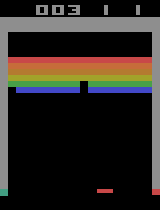

In [34]:
from numpngw import write_apng
from IPython.display import Image
# Convert to apng
write_apng("animation.png", images, delay=60)
# Show last episode animation 
Image(filename="animation.png")

In [40]:
# See more: https://ale.farama.org/environments/breakout/
print("env.action_space: ", env.action_space) # Discrete(4)
print("env.action_space.sample(): ", env.action_space.sample()) #0
print("env.observation_space.sample: ", env.observation_space.sample) # Box(0, 255, (210, 160, 3), uint8)

env.action_space():  Discrete(4)
env.action_space.sample():  0
env.observation_space.sample:  <bound method Box.sample of Box(0, 255, (210, 160, 3), uint8)>


### 3. Vectorise Environment and Train Model
Vectorizing the environment, particularly with mutiple environments, allows you to train the agent faster by training in parallel. 

In [13]:
# make_atari_env is a helper from stable baselines that helps create wrapped Atari environments.
env = make_atari_env('Breakout-v4', n_envs=4, seed=0)
# VecFrameStack allows you to stack the environments together
env = VecFrameStack(env, n_stack=4) # playing/training with 4 different env at once
log_path = os.path.join('Training', 'Logs')
model = A2C("CnnPolicy", env, verbose=1, tensorboard_log=log_path) 
# faster for training if you use CnnPolicy instead of MlpPolicy 

In [17]:
model.learn(total_timesteps=400000)

Logging to Training\Logs\A2C_1
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 275      |
|    ep_rew_mean        | 1.53     |
| time/                 |          |
|    fps                | 280      |
|    iterations         | 100      |
|    time_elapsed       | 7        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.1     |
|    explained_variance | -0.00762 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0879   |
|    value_loss         | 0.0893   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 274      |
|    ep_rew_mean        | 1.59     |
| time/                 |          |
|    fps                | 283      |
|    iterations         | 200      |
|    time_elapsed       | 14       |
|    total_timesteps    | 4000     |
| train

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 342      |
|    ep_rew_mean        | 3.06     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 1400     |
|    time_elapsed       | 92       |
|    total_timesteps    | 28000    |
| train/                |          |
|    entropy_loss       | -1.29    |
|    explained_variance | -1.56    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.116   |
|    value_loss         | 0.0459   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 351      |
|    ep_rew_mean        | 3.25     |
| time/                 |          |
|    fps                | 304      |
|    iterations         | 1500     |
|    time_elapsed       | 98       |
|    total_timesteps    | 30000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 443      |
|    ep_rew_mean        | 5.1      |
| time/                 |          |
|    fps                | 308      |
|    iterations         | 2700     |
|    time_elapsed       | 174      |
|    total_timesteps    | 54000    |
| train/                |          |
|    entropy_loss       | -0.581   |
|    explained_variance | 0.916    |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | 0.0924   |
|    value_loss         | 0.102    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 461      |
|    ep_rew_mean        | 5.46     |
| time/                 |          |
|    fps                | 308      |
|    iterations         | 2800     |
|    time_elapsed       | 181      |
|    total_timesteps    | 56000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 458      |
|    ep_rew_mean        | 5.45     |
| time/                 |          |
|    fps                | 309      |
|    iterations         | 4100     |
|    time_elapsed       | 265      |
|    total_timesteps    | 82000    |
| train/                |          |
|    entropy_loss       | -0.652   |
|    explained_variance | 0.817    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4099     |
|    policy_loss        | -0.0657  |
|    value_loss         | 0.0521   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 464      |
|    ep_rew_mean        | 5.56     |
| time/                 |          |
|    fps                | 309      |
|    iterations         | 4200     |
|    time_elapsed       | 271      |
|    total_timesteps    | 84000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 507      |
|    ep_rew_mean        | 6.32     |
| time/                 |          |
|    fps                | 315      |
|    iterations         | 5500     |
|    time_elapsed       | 349      |
|    total_timesteps    | 110000   |
| train/                |          |
|    entropy_loss       | -0.827   |
|    explained_variance | 0.657    |
|    learning_rate      | 0.0007   |
|    n_updates          | 5499     |
|    policy_loss        | -0.136   |
|    value_loss         | 0.247    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 510      |
|    ep_rew_mean        | 6.39     |
| time/                 |          |
|    fps                | 315      |
|    iterations         | 5600     |
|    time_elapsed       | 354      |
|    total_timesteps    | 112000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 531      |
|    ep_rew_mean        | 6.94     |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 6800     |
|    time_elapsed       | 426      |
|    total_timesteps    | 136000   |
| train/                |          |
|    entropy_loss       | -0.0998  |
|    explained_variance | 0.937    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | -0.00602 |
|    value_loss         | 0.0561   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 540      |
|    ep_rew_mean        | 7.15     |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 6900     |
|    time_elapsed       | 432      |
|    total_timesteps    | 138000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 583      |
|    ep_rew_mean        | 8.05     |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 8200     |
|    time_elapsed       | 514      |
|    total_timesteps    | 164000   |
| train/                |          |
|    entropy_loss       | -0.0525  |
|    explained_variance | 0.145    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | -0.00408 |
|    value_loss         | 0.387    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 593      |
|    ep_rew_mean        | 8.34     |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 8300     |
|    time_elapsed       | 521      |
|    total_timesteps    | 166000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 584      |
|    ep_rew_mean        | 8.16     |
| time/                 |          |
|    fps                | 316      |
|    iterations         | 9600     |
|    time_elapsed       | 607      |
|    total_timesteps    | 192000   |
| train/                |          |
|    entropy_loss       | -0.1     |
|    explained_variance | 0.2      |
|    learning_rate      | 0.0007   |
|    n_updates          | 9599     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.174    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 590      |
|    ep_rew_mean        | 8.35     |
| time/                 |          |
|    fps                | 316      |
|    iterations         | 9700     |
|    time_elapsed       | 613      |
|    total_timesteps    | 194000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 599      |
|    ep_rew_mean        | 8.68     |
| time/                 |          |
|    fps                | 315      |
|    iterations         | 11000    |
|    time_elapsed       | 697      |
|    total_timesteps    | 220000   |
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 0.89     |
|    learning_rate      | 0.0007   |
|    n_updates          | 10999    |
|    policy_loss        | 0.0101   |
|    value_loss         | 0.0513   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 614      |
|    ep_rew_mean        | 9.02     |
| time/                 |          |
|    fps                | 315      |
|    iterations         | 11100    |
|    time_elapsed       | 703      |
|    total_timesteps    | 222000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 624      |
|    ep_rew_mean        | 9.11     |
| time/                 |          |
|    fps                | 317      |
|    iterations         | 12300    |
|    time_elapsed       | 774      |
|    total_timesteps    | 246000   |
| train/                |          |
|    entropy_loss       | -0.191   |
|    explained_variance | 0.96     |
|    learning_rate      | 0.0007   |
|    n_updates          | 12299    |
|    policy_loss        | 0.0158   |
|    value_loss         | 0.0544   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 626      |
|    ep_rew_mean        | 9.01     |
| time/                 |          |
|    fps                | 317      |
|    iterations         | 12400    |
|    time_elapsed       | 780      |
|    total_timesteps    | 248000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 656      |
|    ep_rew_mean        | 9.9      |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 13700    |
|    time_elapsed       | 859      |
|    total_timesteps    | 274000   |
| train/                |          |
|    entropy_loss       | -0.0623  |
|    explained_variance | 0.888    |
|    learning_rate      | 0.0007   |
|    n_updates          | 13699    |
|    policy_loss        | -0.0233  |
|    value_loss         | 0.139    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 682      |
|    ep_rew_mean        | 10.6     |
| time/                 |          |
|    fps                | 318      |
|    iterations         | 13800    |
|    time_elapsed       | 865      |
|    total_timesteps    | 276000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 712      |
|    ep_rew_mean        | 11.3     |
| time/                 |          |
|    fps                | 319      |
|    iterations         | 15000    |
|    time_elapsed       | 938      |
|    total_timesteps    | 300000   |
| train/                |          |
|    entropy_loss       | -0.159   |
|    explained_variance | 0.543    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14999    |
|    policy_loss        | -0.0369  |
|    value_loss         | 0.398    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 705      |
|    ep_rew_mean        | 11.2     |
| time/                 |          |
|    fps                | 319      |
|    iterations         | 15100    |
|    time_elapsed       | 944      |
|    total_timesteps    | 302000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 674      |
|    ep_rew_mean        | 10.4     |
| time/                 |          |
|    fps                | 320      |
|    iterations         | 16400    |
|    time_elapsed       | 1024     |
|    total_timesteps    | 328000   |
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 0.766    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16399    |
|    policy_loss        | 0.0333   |
|    value_loss         | 0.139    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 667      |
|    ep_rew_mean        | 10.2     |
| time/                 |          |
|    fps                | 320      |
|    iterations         | 16500    |
|    time_elapsed       | 1031     |
|    total_timesteps    | 330000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 658      |
|    ep_rew_mean        | 10       |
| time/                 |          |
|    fps                | 320      |
|    iterations         | 17800    |
|    time_elapsed       | 1109     |
|    total_timesteps    | 356000   |
| train/                |          |
|    entropy_loss       | -0.161   |
|    explained_variance | 0.543    |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | 0.0125   |
|    value_loss         | 0.332    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 648      |
|    ep_rew_mean        | 9.74     |
| time/                 |          |
|    fps                | 320      |
|    iterations         | 17900    |
|    time_elapsed       | 1115     |
|    total_timesteps    | 358000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 754      |
|    ep_rew_mean        | 11.9     |
| time/                 |          |
|    fps                | 322      |
|    iterations         | 19200    |
|    time_elapsed       | 1192     |
|    total_timesteps    | 384000   |
| train/                |          |
|    entropy_loss       | -0.0585  |
|    explained_variance | 0.931    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19199    |
|    policy_loss        | -0.0343  |
|    value_loss         | 0.0422   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 754      |
|    ep_rew_mean        | 12       |
| time/                 |          |
|    fps                | 322      |
|    iterations         | 19300    |
|    time_elapsed       | 1198     |
|    total_timesteps    | 386000   |
| train/                |          |
|

### 4. Save and Reload Model

In [5]:
# Save model
a2c_path = os.path.join('Training', 'Saved_Models', 'A2C_model')
model.save(a2c_path)
del model

env = make_atari_env('Breakout-v4', n_envs=1, seed=0) 
env = VecFrameStack(env, n_stack=4)

model = A2C.load(a2c_path, env)

Training\Saved_Models\A2C_model
Wrapping the env in a VecTransposeImage.


### 5. Evaluate and Test

In [6]:
 # remeber to make the environment to be 1 only, not stacked environment
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)

print(f"Mean reward: {mean_reward}, Std: {std_reward}")

Mean reward: 15.2, Std: 8.784076502399099


In [24]:
# a reminder if you want to see real-time result like in video, please change the render_mode to 
# be "human" instead of "rgb_array"
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
env.close()

KeyboardInterrupt: 

## Project 2 - Self Driving

### 1. Import Dependencies

In [ ]:
# old version of setup
#Install SWIG https://sourceforge.net/projects/swig/files/swigwin/swigwin-4.0.2/swigwin-4.0.2.zip/download?use_mirror=ixpeering
# !pip install gym[box2d] pyglet==1.3.2

In [21]:
# You need this to run self driving car environment

# ! pip install "gymnasium[box2d]" and  pip install gymnasium[box2d] -> doesn't work
# -> solution: https://github.com/openai/gym/issues/2795

#! pip install swig
#! pip install box2d pygame

In [41]:
# import gym
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv # train models in multiple environment at same time; speed up training

import os

### 2. Test Environment


In [43]:
environment_name = "CarRacing-v3"
env = gym.make(environment_name, render_mode="rgb_array") #"human"
env = DummyVecEnv([lambda: env]) #wrap env in a dummy vector environment
# env = Monitor(env) 
# env.render() # you can see the race track by executing this command
# env.close() # remember to close it to avoid crashing kernel

In [33]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:-868.8563380282757
Episode:2 Score:-863.0614840990453
Episode:3 Score:-885.9333333334439
Episode:4 Score:-864.1828220859951
Episode:5 Score:-862.8081850534861


In [44]:
print("env.action_space.sample():", env.action_space.sample())
print("env.observation_space.sample:", env.observation_space.sample)

env.action_space.sample(): [0.24760835 0.36255878 0.11487844]
env.observation_space.sample: <bound method Box.sample of Box(0, 255, (96, 96, 3), uint8)>


### 3. Train Model

In [45]:
log_path = os.path.join('Training', 'Logs')
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [36]:
model.learn(total_timesteps=40000)

Logging to Training\Logs\PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -58.1    |
| time/              |          |
|    fps             | 99       |
|    iterations      | 1        |
|    time_elapsed    | 20       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -54.8       |
| time/                   |             |
|    fps                  | 79          |
|    iterations           | 2           |
|    time_elapsed         | 51          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004951817 |
|    clip_fraction        | 0.0557      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | 0.00371     |

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -46.3       |
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 11          |
|    time_elapsed         | 322         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015831336 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.96       |
|    explained_variance   | 0.734       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00308     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0152     |
|    std                  | 0.904       |
|    value_loss           | 0.251       |
-----------------------------------------
-----------------------------------------
| rollout/                |       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -25.5      |
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 20         |
|    time_elapsed         | 596        |
|    total_timesteps      | 40960      |
| train/                  |            |
|    approx_kl            | 0.03832517 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.65      |
|    explained_variance   | 0.84       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.142      |
|    n_updates            | 190        |
|    policy_gradient_loss | -0.0268    |
|    std                  | 0.81       |
|    value_loss           | 0.677      |
----------------------------------------


### 4. Save Model

In [37]:
ppo_path = os.path.join('Training', 'Saved_Models', 'PPO_Driving_model')
model.save(ppo_path)

### 5. Evaluate and Test

In [ ]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)

print(f"Mean reward: {mean_reward}, Std: {std_reward}")

In [ ]:
obs, info = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
env.close()

## Project 3 - Custom Environment

https://sourceforge.net/projects/swig/files/swigwin/swigwin-4.0.2/swigwin-4.0.2.zip/download?use_mirror=ixpeering


### 1. Import Dependencies

In [ ]:
import gym
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete
import numpy as np
import random
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

from stable_baselines3.common.env_checker import check_env

### 2. Types of Spaces

In [ ]:
Discrete(3)

In [ ]:
Box(0,1,shape=(3,3)).sample()

In [ ]:
Box(0,255,shape=(3,3), dtype=int).sample()

In [ ]:
Tuple((Discrete(2), Box(0,100, shape=(1,)))).sample()

In [ ]:
Dict({'height':Discrete(2), "speed":Box(0,100, shape=(1,))}).sample()

In [ ]:
MultiBinary(4).sample()

In [ ]:
MultiDiscrete([5,2,2]).sample()

### 3. Building an Environment

In [ ]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(3)
        # Temperature array
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        # Set start temp
        self.state = 38 + random.randint(-3,3)
        # Set shower length
        self.shower_length = 60

    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0
        # 2 -1 = 1 temperature
        self.state += action -1
        # Reduce shower length by 1 second
        self.shower_length -= 1

        # Calculate reward
        if self.state >=37 and self.state <=39:
            reward =1
        else:
            reward = -1

        # Check if shower is done
        if self.shower_length <= 0:
            done = True
        else:
            done = False

        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}

        # Return step information
        return self.state, reward, truncated, done, info # added truncated

    def render(self):
        # Implement viz
        pass

    def reset(self):
        # Reset shower temperature
        self.state = np.array([38 + random.randint(-3,3)]).astype(float)
        # Reset shower time
        self.shower_length = 60
        return self.state

In [ ]:
env=ShowerEnv()

In [ ]:
env.observation_space.sample()

In [ ]:
env.reset()

In [ ]:
check_env(env, warn=True)

### 4. Test Environment

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        #n_state, reward, done, info = env.step(action) #old version
        n_state, reward, done, truncated, info = env.step(action)

        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

In [ ]:
env.close()

### 5. Train Model

In [ ]:
log_path = os.path.join('Training', 'Logs')
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=400000)

### 6. Save Model

In [ ]:
model.save('PPO')

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)